In [4]:
from IPython.display import Image, display                                                                                      
display(Image(filename='E:\\Manish\\ML Study\\Deep Learning Course\\Python Assignments\\notMNIST_small\\B\\MDEtMDEtMDAudHRm.png'))


In [5]:
os.listdir()

['.anaconda',
 '.astropy',
 '.bash_history',
 '.bluefish',
 '.cisco',
 '.conda',
 '.config',
 '.eclipse',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.octave_hist',
 '.oracle_jre_usage',
 '.p2',
 '.pencil',
 '.PyCharmCE2017.1',
 '.sapvi',
 '.spyder-py3',
 '.tooling',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'eclipse',
 'EurekaLog',
 'Favorites',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{485596c4-7ed5-11e5-80df-e41d2d718e10}.TM.blf',
 'NTUSER.DAT{485596c4-7ed5-11e5-80df-e41d2d718e10}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{485596c4-7ed5-11e5-80df-e41d2d718e10}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'ntuser.pol',
 'OneDrive',
 'Pictures',
 'PrintHood',
 'PycharmProjects',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'Templates',
 'Untitled Folder',
 'Un

In [6]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [7]:
os.chdir('E:\Manish\ML Study\Deep Learning Course\Python Assignments')



In [8]:
os.listdir()

['notMNIST_large',
 'notMNIST_large.tar.gz',
 'notMNIST_small',
 'notMNIST_small.tar.gz']

In [9]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)



NameError: name 'train_folders' is not defined

In [10]:
train_folders=['notMNIST_large/A', 'notMNIST_large/B', 'notMNIST_large/C', 'notMNIST_large/D', 'notMNIST_large/E', 'notMNIST_large/F', 'notMNIST_large/G', 'notMNIST_large/H', 'notMNIST_large/I', 'notMNIST_large/J']


In [11]:
test_folders = ['notMNIST_small/A', 'notMNIST_small/B', 'notMNIST_small/C', 'notMNIST_small/D', 'notMNIST_small/E', 'notMNIST_small/F', 'notMNIST_small/G', 'notMNIST_small/H', 'notMNIST_small/I', 'notMNIST_small/J']

In [12]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

notMNIST_large/A.pickle already present - Skipping pickling.
notMNIST_large/B.pickle already present - Skipping pickling.
notMNIST_large/C.pickle already present - Skipping pickling.
notMNIST_large/D.pickle already present - Skipping pickling.
notMNIST_large/E.pickle already present - Skipping pickling.
notMNIST_large/F.pickle already present - Skipping pickling.
notMNIST_large/G.pickle already present - Skipping pickling.
notMNIST_large/H.pickle already present - Skipping pickling.
notMNIST_large/I.pickle already present - Skipping pickling.
notMNIST_large/J.pickle already present - Skipping pickling.
notMNIST_small/A.pickle already present - Skipping pickling.
notMNIST_small/B.pickle already present - Skipping pickling.
notMNIST_small/C.pickle already present - Skipping pickling.
notMNIST_small/D.pickle already present - Skipping pickling.
notMNIST_small/E.pickle already present - Skipping pickling.
notMNIST_small/F.pickle already present - Skipping pickling.
notMNIST_small/G.pickle 

In [13]:
train_datasets_arr= np.array(train_datasets)

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [14]:
train_datasets_arr= np.array(train_datasets)

In [15]:
test_datasets_arr= np.array(test_datasets)

ValueError: could not convert string to float: 'notMNIST_large/A.pickle'

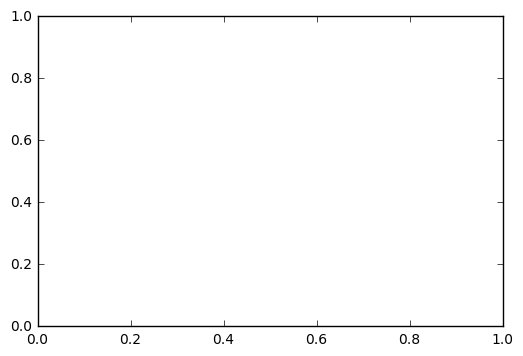

In [16]:
plt.plot(train_datasets_arr,'ro')
plt.show()

In [ ]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter_graph(folder):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  
return dataset

dataset = load_letter_graph('notMNIST_large//A')
import matplotlib.pyplot as plt
plt.plot(dataset)
plt.show()

In [23]:
import random
%matplotlib inline
def showProcessedRandom(dataset,labels,n): # shows size of the sample
    indices=random.sample(range(0,labels.shape[0]),n)
    fig=plt.figure()
    for i in range(n):
        a=fig.add_subplot(1,n,i+1)
        plt.imshow(dataset[indices[i],:,:])
        a.set_title(chr(labels[indices[i]]+ord('A')))
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    plt.show()
    
showProcessedRandom(train_datasets,train_labels,5) 
showProcessedRandom(test_datasets,test_labels,5)

NameError: name 'train_labels' is not defined

TypeError: Image data can not convert to float

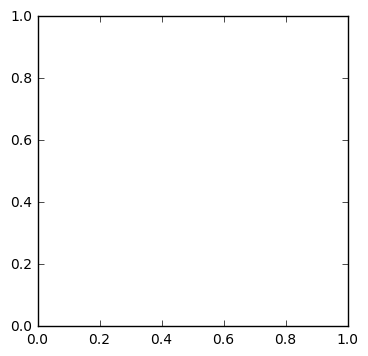

In [25]:
%matplotlib inline
from random import randint
plt.imshow(train_datasets[randint(0,len(train_datasets))])

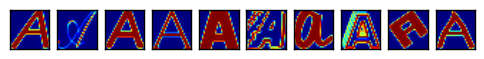

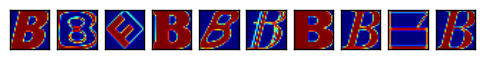

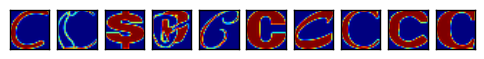

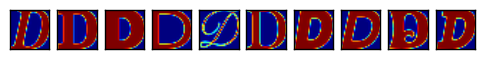

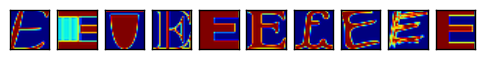

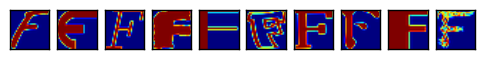

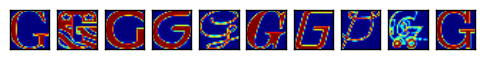

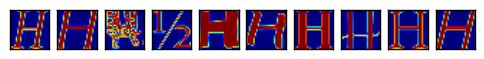

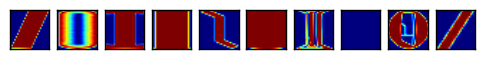

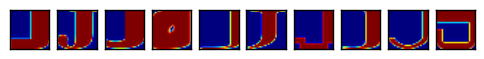

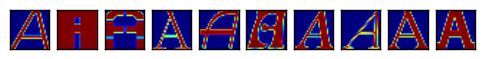

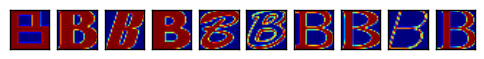

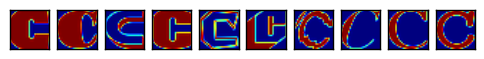

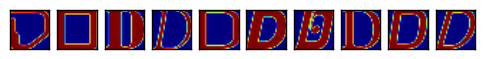

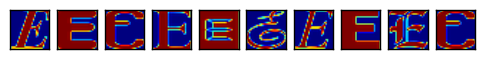

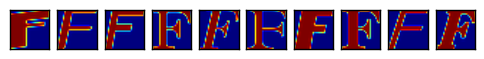

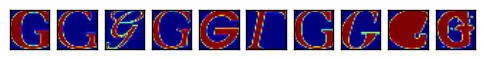

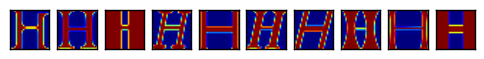

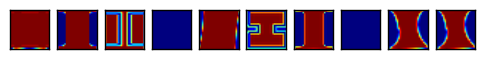

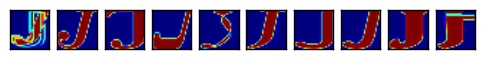

In [32]:
%matplotlib inline
def showProcessedRandom(dataset_name,n): # shows size of the sample
    with open(dataset_name, 'rb') as f:
        dataset = pickle.load(f)
        indices=np.random.choice(dataset.shape[0], n)
        fig=plt.figure()
        for i in range(n):
            a=fig.add_subplot(1,n,i+1)
            plt.imshow(dataset[indices[i],:,:])
            # a.set_title(chr(labels[indices[i]]+ord('A')))
            a.axes.get_xaxis().set_visible(False)
            a.axes.get_yaxis().set_visible(False)
        plt.show()
    f.close()

for name in train_datasets:
    showProcessedRandom(name,10) 
for name in test_datasets:
    showProcessedRandom(name,10)

In [33]:
for i in range(10):
    with open(train_datasets[i], 'rb') as fp:
        letter_set = pickle.load(fp)
        print(letter_set.shape)

(52909, 28, 28)
(52911, 28, 28)
(52912, 28, 28)
(52911, 28, 28)
(52912, 28, 28)
(52912, 28, 28)
(52912, 28, 28)
(52912, 28, 28)
(52912, 28, 28)
(52911, 28, 28)


In [39]:
for i in range(len(train_datasets)):
    print(train_datasets[i])
    print(pickle.load(open(train_datasets[i],"rb")).shape)

notMNIST_large/A.pickle
(52909, 28, 28)
notMNIST_large/B.pickle
(52911, 28, 28)
notMNIST_large/C.pickle
(52912, 28, 28)
notMNIST_large/D.pickle
(52911, 28, 28)
notMNIST_large/E.pickle
(52912, 28, 28)
notMNIST_large/F.pickle
(52912, 28, 28)
notMNIST_large/G.pickle
(52912, 28, 28)
notMNIST_large/H.pickle
(52912, 28, 28)
notMNIST_large/I.pickle
(52912, 28, 28)
notMNIST_large/J.pickle
(52911, 28, 28)


In [44]:
print('test_datasets')
for i in range(len(test_datasets)):
    print(pickle.load(open(test_datasets[i],"rb")).shape)

test_datasets
(1872, 28, 28)
(1873, 28, 28)
(1873, 28, 28)
(1873, 28, 28)
(1873, 28, 28)
(1872, 28, 28)
(1872, 28, 28)
(1872, 28, 28)
(1872, 28, 28)
(1872, 28, 28)


In [48]:
def is_balanced(datasets): 
    dataset_shapes = []
    for dataset_name in datasets:
        with open(dataset_name, 'rb') as f:
            dataset = pickle.load(f)
            dataset_shapes.append(dataset.shape)
            print(dataset_name,' Full dataset tensor:', dataset.shape)
            f.close()
    print('Mean:', np.mean(dataset_shapes, axis=0))
    print('Standard deviation:', np.std(dataset_shapes, axis=0))

is_balanced(train_datasets)
is_balanced(test_datasets)



notMNIST_large/A.pickle  Full dataset tensor: (52909, 28, 28)
notMNIST_large/B.pickle  Full dataset tensor: (52911, 28, 28)
notMNIST_large/C.pickle  Full dataset tensor: (52912, 28, 28)
notMNIST_large/D.pickle  Full dataset tensor: (52911, 28, 28)
notMNIST_large/E.pickle  Full dataset tensor: (52912, 28, 28)
notMNIST_large/F.pickle  Full dataset tensor: (52912, 28, 28)
notMNIST_large/G.pickle  Full dataset tensor: (52912, 28, 28)
notMNIST_large/H.pickle  Full dataset tensor: (52912, 28, 28)
notMNIST_large/I.pickle  Full dataset tensor: (52912, 28, 28)
notMNIST_large/J.pickle  Full dataset tensor: (52911, 28, 28)
Mean: [  5.29114000e+04   2.80000000e+01   2.80000000e+01]
Standard deviation: [ 0.91651514  0.          0.        ]
notMNIST_small/A.pickle  Full dataset tensor: (1872, 28, 28)
notMNIST_small/B.pickle  Full dataset tensor: (1873, 28, 28)
notMNIST_small/C.pickle  Full dataset tensor: (1873, 28, 28)
notMNIST_small/D.pickle  Full dataset tensor: (1873, 28, 28)
notMNIST_small/E.pi

In [49]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [58]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

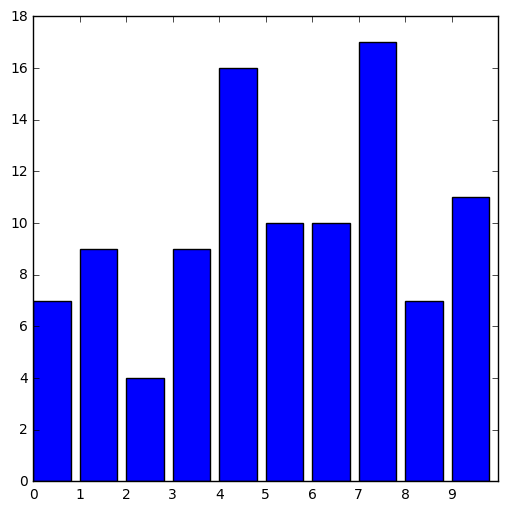

In [60]:
samples = 100
plt.figure(figsize=(6,6))
plt.bar(range(10), np.bincount(train_labels[:samples]))
plt.xticks(range(10));

In [53]:
valid_labels

array([2, 0, 6, ..., 5, 1, 2])

(array([ 20000.,  20000.,  20000.,  20000.,  20000.,  20000.,  20000.,
         20000.,  20000.,  20000.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

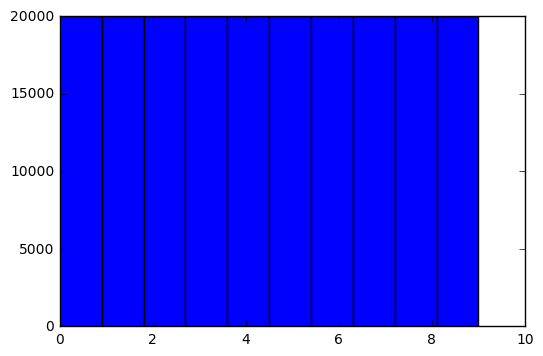

In [61]:
plt.hist(train_labels)


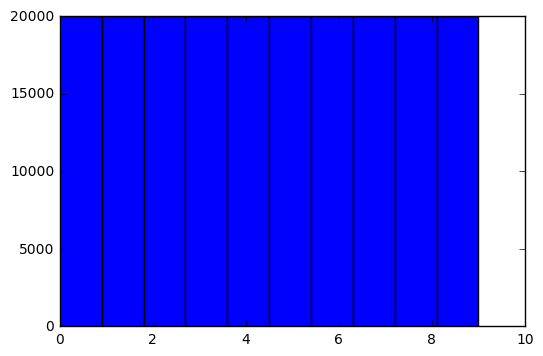

In [62]:
import matplotlib.pyplot as plt

plt.hist(train_labels, 10)
plt.show()

In [64]:
data_root = '.'
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [65]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800512


In [68]:
from time import time
import hashlib
# ===================================================
#                                     FIND DUPLICATES
# ===================================================
# Inspired by eythian's method for duplicates
# https://discussions.udacity.com/t/assignment-1-problem-5/45657/10
t0 = time()
# Set data to read only so we can create hashes
train_dataset.flags.writeable=False
test_dataset.flags.writeable=False
valid_dataset.flags.writeable=False

# Get hashes for all images as a list (to preserve indices)
train_hashes = [hash(image.data) for image in train_dataset]
test_hashes = [hash(image.data) for image in test_dataset]
valid_hashes = [hash(image.data) for image in valid_dataset]

# Unique set of hashes found in train. And the set of hashes in test and 
# validation that overlap with the hashes the training data
unique_train_hashes = set(train_hashes)
test_overlap_hashes = unique_train_hashes.intersection(set(test_hashes))
valid_overlap_hashes = unique_train_hashes.intersection(set(valid_hashes))

# ---------------------------------------------------
#                                 Create Dictionaries
# ---------------------------------------------------
# Dictionary Keys represent every unique hash from the training data.
# Dictionary Values are lists of indices in the corresponding dataset have that 
# hash.

# Initialise the dictionaries with empty lists
train_hash_dict =  {val: [] for val in unique_train_hashes}
test_hash_dict = {val: [] for val in test_overlap_hashes}
valid_hash_dict = {val: [] for val in valid_overlap_hashes}

# For the train set, append the indices to the corresponding hash
filter(lambda i,val): train_hash_dict[val].append(i), enumerate(train_hashes))

# For test set, append indices only if the hash overlaps with train set
for i, image_hash in enumerate(test_hashes):
    if image_hash in test_overlap_hashes:
        test_hash_dict[image_hash].append(i)

# The same for the validation set
for i, image_hash in enumerate(valid_hashes):
    if image_hash in valid_overlap_hashes:
        valid_hash_dict[image_hash].append(i)
print("Found Duplicate indices in in", time() - t0, "seconds")

SyntaxError: invalid syntax (<ipython-input-68-943ae62c5e2f>, line 38)

In [77]:
train_dataset.flags.writeable=False
test_dataset.flags.writeable=False
dup_table={}
for idx,img in enumerate(train_dataset):
    h = hash(bytes(img.data))
    if h in dup_table and (train_dataset[dup_table[h]].data == img.data):
       print ('Duplicate image: %d matches %d' % (idx, dup_table[h]))
    dup_table[h] = idx
for idx,img in enumerate(test_dataset):
    h = hash(img.data)
    if h in dup_table and (train_dataset[dup_table[h]].data == img.data):
        print ('Test image %d is in the training set' % idx)

Duplicate image: 129 matches 107
Duplicate image: 306 matches 129
Duplicate image: 349 matches 306
Duplicate image: 388 matches 349
Duplicate image: 451 matches 388
Duplicate image: 477 matches 451
Duplicate image: 481 matches 477
Duplicate image: 516 matches 481
Duplicate image: 563 matches 516
Duplicate image: 574 matches 563
Duplicate image: 616 matches 190
Duplicate image: 638 matches 574
Duplicate image: 644 matches 638
Duplicate image: 650 matches 644
Duplicate image: 675 matches 650
Duplicate image: 681 matches 675
Duplicate image: 686 matches 681
Duplicate image: 830 matches 686
Duplicate image: 887 matches 830
Duplicate image: 983 matches 887
Duplicate image: 1166 matches 983
Duplicate image: 1288 matches 1166
Duplicate image: 1325 matches 1288
Duplicate image: 1406 matches 1325
Duplicate image: 1490 matches 1406
Duplicate image: 1527 matches 537
Duplicate image: 1666 matches 1490
Duplicate image: 1743 matches 1666
Duplicate image: 1880 matches 1743
Duplicate image: 1886 match

ValueError: memoryview: hashing is restricted to formats 'B', 'b' or 'c'

In [4]:
import time
import hashlib

t1 = time.time()

train_hashes = [hashlib.sha1(x).digest() for x in train_dataset]
valid_hashes = [hashlib.sha1(x).digest() for x in valid_dataset]
test_hashes  = [hashlib.sha1(x).digest() for x in test_dataset]

valid_in_train = np.in1d(valid_hashes, train_hashes)
test_in_train  = np.in1d(test_hashes,  train_hashes)
test_in_valid  = np.in1d(test_hashes,  valid_hashes)

valid_keep = ~valid_in_train
test_keep  = ~(test_in_train | test_in_valid)

valid_dataset_clean = valid_dataset[valid_keep]
valid_labels_clean  = valid_labels [valid_keep]

test_dataset_clean = test_dataset[test_keep]
test_labels_clean  = test_labels [test_keep]

t2 = time.time()

print("Time: %0.2fs" % (t2 - t1))
print("valid -> train overlap: %d samples" % valid_in_train.sum())
print("test  -> train overlap: %d samples" % test_in_train.sum())
print("test  -> valid overlap: %d samples" % test_in_valid.sum())

NameError: name 'train_dataset' is not defined

In [79]:
valid_keep


array([ True,  True, False, ..., False,  True,  True], dtype=bool)

In [80]:
valid_dataset_clean

array([[[-0.11568628,  0.46470588,  0.40980393, ..., -0.5       ,
          0.15490197, -0.13921569],
        [-0.20980392,  0.5       ,  0.5       , ..., -0.5       ,
          0.32352942,  0.04509804],
        [-0.2254902 ,  0.49215686,  0.49607843, ..., -0.5       ,
          0.22156863,  0.0882353 ],
        ..., 
        [-0.2254902 ,  0.49215686,  0.5       , ..., -0.5       ,
          0.21372549,  0.08431373],
        [-0.20588236,  0.5       ,  0.5       , ..., -0.5       ,
          0.29607844,  0.07647059],
        [-0.07254902,  0.5       ,  0.48823529, ..., -0.5       ,
          0.11960784, -0.0882353 ]],

       [[-0.5       , -0.5       , -0.5       , ..., -0.5       ,
         -0.5       , -0.5       ],
        [-0.5       , -0.5       , -0.5       , ..., -0.5       ,
         -0.5       , -0.5       ],
        [-0.5       , -0.5       , -0.5       , ..., -0.5       ,
         -0.5       , -0.5       ],
        ..., 
        [-0.49607843, -0.49607843, -0.5       , ...,

In [81]:
num_samples

NameError: name 'num_samples' is not defined

In [82]:
from sklearn import linear_model

n_sample_arr = [50, 100, 1000, 5000, len(train_dataset)]

logistic = linear_model.LogisticRegression()

In [ ]:
for n_samples in n_sample_arr:
    x_train = np.reshape(train_dataset,(train_size,image_size*image_size))[0:n_samples]
    y_train = train_labels[0:n_samples]

    x_valid = np.reshape(valid_dataset,(valid_size,image_size*image_size))
    y_valid = valid_labels

    x_valid_clean = np.reshape(valid_dataset_clean,(len(valid_dataset_clean),image_size*image_size))
    y_valid_clean = valid_labels_clean

    x_test = np.reshape(test_dataset,(test_size,image_size*image_size))
    y_test = test_labels

    x_test_clean = np.reshape(test_dataset_clean,(len(test_dataset_clean),image_size*image_size))
    y_test_clean = test_labels_clean

    t1 = time.time()

    model = logistic.fit(x_train, y_train)

    t2 = time.time()

    valid_score = model.score(x_valid, y_valid)
    valid_score_clean = model.score(x_valid_clean, y_valid_clean)

    test_score = model.score(x_test, y_test)
    test_score_clean = model.score(x_test_clean, y_test_clean)

    print('%d samples LogisticRegression, time taken %0.2fs' % (n_samples,(t2 - t1)))
    print('valid score: %f , valid score(clean): %f' % (valid_score,valid_score_clean))
    print('test score: %f , test score(clean): %f' % (test_score,test_score_clean))

50 samples LogisticRegression, time taken 0.29s
valid score: 0.642200 , valid score(clean): 0.628126
test score: 0.686100 , test score(clean): 0.673263
100 samples LogisticRegression, time taken 0.11s
valid score: 0.690800 , valid score(clean): 0.678367
test score: 0.742300 , test score(clean): 0.730327
1000 samples LogisticRegression, time taken 3.25s
valid score: 0.770100 , valid score(clean): 0.756532
test score: 0.843900 , test score(clean): 0.832835
5000 samples LogisticRegression, time taken 28.84s
valid score: 0.776800 , valid score(clean): 0.763822
test score: 0.849000 , test score(clean): 0.837207


In [ ]:
n_sample_arr[]

In [2]:
import os
os.chdir('E:\Manish\ML Study\Deep Learning Course\Python Assignments')
data_root = '.'
pickle_file = os.path.join(data_root, 'notMNIST_clean.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset_clean': valid_dataset_clean,
    'valid_labels_clean': valid_labels_clean,
    'test_dataset_clean': test_dataset_clean,
    'test_labels_clean': test_labels_clean,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

Unable to save data to .\notMNIST_clean.pickle : name 'train_dataset' is not defined


NameError: name 'train_dataset' is not defined